In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Mountain_Beach_Sear_Forest_BD.zip

Archive:  /content/drive/MyDrive/Mountain_Beach_Sear_Forest_BD.zip
   creating: Mounatin_Beach_Sear_Forest_BD/
   creating: Mounatin_Beach_Sear_Forest_BD/TRAIN/
   creating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/beach1.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/Beach10.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/Beach11.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/Beach12.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/Beach13.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/Beach14.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/Beach15.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/Beach2.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/Beach3.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/beach4.jpg  
  inflating: Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach/Beach5.jpg  
  inflating: Mounatin_Beach_S

In [ ]:
import os
print('total Beach training images:', len(os.listdir('/content/Mounatin_Beach_Sear_Forest_BD/TRAIN/Beach')))
print('total Beach validation images:', len(os.listdir('/content/Mounatin_Beach_Sear_Forest_BD/VAL/Beach')))
print('total Desert training images:', len(os.listdir('/content/Mounatin_Beach_Sear_Forest_BD/TRAIN/Desert')))
print('total Desert validation images:', len(os.listdir('/content/Mounatin_Beach_Sear_Forest_BD/VAL/Desert')))
print('total Forest training images:', len(os.listdir('/content/Mounatin_Beach_Sear_Forest_BD/TRAIN/Forest')))
print('total Forest validation images:', len(os.listdir('/content/Mounatin_Beach_Sear_Forest_BD/VAL/Forest')))
print('total Mountain training images:', len(os.listdir('/content/Mounatin_Beach_Sear_Forest_BD/TRAIN/Mountain')))
print('total Mountain validation images:', len(os.listdir('/content/Mounatin_Beach_Sear_Forest_BD/VAL/Mountain')))

total Beach training images: 15
total Beach validation images: 5
total Desert training images: 15
total Desert validation images: 5
total Forest training images: 15
total Forest validation images: 5
total Mountain training images: 15
total Mountain validation images: 5


In [ ]:
train_dir = '/content/Mounatin_Beach_Sear_Forest_BD/TRAIN'
validation_dir = '/content/Mounatin_Beach_Sear_Forest_BD/VAL'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   zoom_range=0.4,
                                   horizontal_flip=False,
                                   vertical_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical')

train_generator2 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=2,
    class_mode='categorical')

validation_generator2 = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=2,
    class_mode='categorical')

Found 60 images belonging to 4 classes.
Found 20 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'Beach': 0, 'Desert': 1, 'Forest': 2, 'Mountain': 3}

In [ ]:
validation_generator.class_indices

{'Beach': 0, 'Desert': 1, 'Forest': 2, 'Mountain': 3}

In [ ]:
def class_print(classe):
  print("Predicted :",end=' ')
  if classe==0:
    print('Beach')
  elif classe==1:
    print('Desert')
  elif classe==2:
    print('Forest')
  else:
    print('Mountain')

# **A- Transfer Learning**

### **1) VGG 19 Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import applications
from keras.models import Sequential
from keras.layers import Dropout,Dense,Conv2D,GlobalAveragePooling2D
from keras.models import Model

In [ ]:
img_width,img_height=224,224

base_model =applications.VGG19(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))

top_model=Sequential()
top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:],data_format=None))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.25))
top_model.add(Dense(4,activation='softmax'))

transfer_model1 = Model(inputs=base_model.input,outputs=top_model(base_model.output))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
transfer_model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fitted_model1 = transfer_model1.fit(train_generator,epochs=25,validation_data=validation_generator, callbacks=callbacks_list)

Epoch 1/25
30/30 [==============================] - 162s 5s/step - loss: 8.8997 - accuracy: 0.2667 - val_loss: 1.4762 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/25
30/30 [==============================] - 155s 5s/step - loss: 1.4986 - accuracy: 0.2500 - val_loss: 1.3994 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 3/25
30/30 [==============================] - 154s 5s/step - loss: 1.5330 - accuracy: 0.2333 - val_loss: 1.4455 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 4/25
30/30 [==============================] - 155s 5s/step - loss: 1.4461 - accuracy: 0.2000 - val_loss: 1.3889 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/25
30/30 [==============================] - 155s 5s/step - loss: 1.4261 - accuracy: 0.2000 - val_loss: 1.3872 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 6/25
30/30 [==============================] - 155s 5s/step - loss: 1.4119 - accuracy: 0.2500 - val_loss: 1.3871 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 7/25
30/30 [==============================] - 154s 5s/step - loss: 1.4

In [ ]:
transfer_model1.save_weights("Vgg19Model.h5")

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
img_path1='/content/drive/MyDrive/Beach.jpg'
img_path2='/content/drive/MyDrive/Desert.jpg'
img_path3='/content/drive/MyDrive/Forest.jpg'
img_path4='/content/drive/MyDrive/Mountain.jpg'

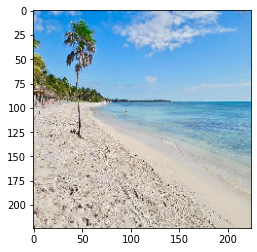

In [ ]:
img1_transfer = image.load_img(img_path1, target_size=(224,224))
plt.imshow(img1_transfer)
plt.show()
img1 = image.img_to_array(img1_transfer)
x1 = np.expand_dims(img1, axis=0) * 1./255

In [ ]:
score11 = transfer_model1.predict(x1)
class_predicted11 = score11.argmax()
print(score11)
class_print(class_predicted11)

[[0.25056547 0.24764158 0.24962348 0.25216943]]
Predicted : Mountain


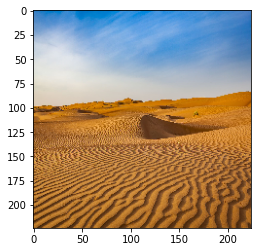

In [ ]:
img2 = image.load_img(img_path2, target_size=(224,224))
plt.imshow(img2)
plt.show()
img2 = image.img_to_array(img2)
x2 = np.expand_dims(img2, axis=0) * 1./255

In [ ]:
score12 = transfer_model1.predict(x2)
class_predicted12 = score12.argmax()
print(score12)
class_print(class_predicted12)

[[0.25054628 0.24764572 0.24962789 0.25218004]]
Predicted : Mountain


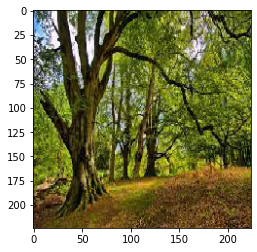

In [ ]:
img3 = image.load_img(img_path3, target_size=(224,224))
plt.imshow(img3)
plt.show()
img3 = image.img_to_array(img3)
x3 = np.expand_dims(img3, axis=0) * 1./255

In [ ]:
score13 = transfer_model1.predict(x3)
class_predicted13 = score13.argmax()
print(score13)
class_print(class_predicted13)

[[0.2505637  0.24764085 0.24962576 0.2521696 ]]
Predicted : Mountain


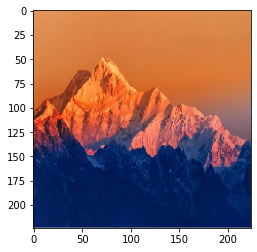

In [ ]:
img4 = image.load_img(img_path4, target_size=(224,224))
plt.imshow(img4)
plt.show()
img4 = image.img_to_array(img4)
x4 = np.expand_dims(img4, axis=0) * 1./255

In [ ]:
score14 = transfer_model1.predict(x4)
class_predicted14 = score14.argmax()
print(score14)
class_print(class_predicted14)

[[0.2505562  0.24764422 0.24962455 0.25217497]]
Predicted : Mountain


### **2) VGG 16 Model**

In [ ]:
img_width,img_height=224,224

base_model =applications.VGG16(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))

top_model=Sequential()
top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:],data_format=None))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.25))
top_model.add(Dense(4,activation='softmax'))

transfer_model2 = Model(inputs=base_model.input,outputs=top_model(base_model.output))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
transfer_model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
fitted_model2 = transfer_model2.fit(train_generator,epochs=25,validation_data=validation_generator, callbacks=callbacks_list)

Epoch 1/25
30/30 [==============================] - 126s 4s/step - loss: 2.7506 - accuracy: 0.2000 - val_loss: 1.3818 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/25
30/30 [==============================] - 124s 4s/step - loss: 1.4202 - accuracy: 0.2167 - val_loss: 1.3884 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/25
30/30 [==============================] - 124s 4s/step - loss: 1.4081 - accuracy: 0.2500 - val_loss: 1.3874 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 4/25
30/30 [==============================] - 125s 4s/step - loss: 1.3983 - accuracy: 0.1833 - val_loss: 1.3881 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/25
30/30 [==============================] - 125s 4s/step - loss: 1.3974 - accuracy: 0.2167 - val_loss: 1.3866 - val_accuracy: 0.2500 - lr: 0.0010


In [ ]:
transfer_model2.save_weights("Vgg16Model.h5")

In [ ]:
score21 = transfer_model2.predict(x1)
class_predicted21 = score21.argmax()
print(score21)
class_print(class_predicted21)

[[0.24541771 0.25248903 0.25443774 0.24765547]]
Predicted : Forest


In [ ]:
score22 = transfer_model2.predict(x2)
class_predicted22 = score22.argmax()
print(score22)
class_print(class_predicted22)

[[0.24541342 0.25247326 0.25455248 0.2475608 ]]
Predicted : Forest


In [ ]:
score23 = transfer_model2.predict(x3)
class_predicted23 = score23.argmax()
print(score23)
class_print(class_predicted23)

[[0.24544458 0.2525883  0.2540089  0.2479582 ]]
Predicted : Forest


In [ ]:
score24 = transfer_model2.predict(x4)
class_predicted24 = score24.argmax()
print(score24)
class_print(class_predicted24)

[[0.24533387 0.25244346 0.2547827  0.24743997]]
Predicted : Forest


# **B- Custom Models**

###**1) Custom Model n°1**

In [ ]:
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
model1 = Sequential()
model1.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(299, 299, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(1000, activation='sigmoid'))
model1.add(layers.Dense(4, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 297, 297, 256)     7168      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 148, 148, 256)    0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 146, 146, 256)     590080    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 73, 73, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 128)       295040    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 35, 35, 128)     

In [ ]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
fitted_model3 = model1.fit(train_generator2,epochs=25, validation_data=validation_generator2, callbacks=callbacks_list)

Epoch 1/25
30/30 [==============================] - 166s 6s/step - loss: 1.6703 - accuracy: 0.2000 - val_loss: 1.6011 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/25
30/30 [==============================] - 123s 4s/step - loss: 1.5596 - accuracy: 0.1667 - val_loss: 1.4131 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/25
30/30 [==============================] - 124s 4s/step - loss: 1.5273 - accuracy: 0.2333 - val_loss: 1.4511 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 4/25
30/30 [==============================] - 130s 4s/step - loss: 1.5001 - accuracy: 0.2833 - val_loss: 1.5460 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/25
30/30 [==============================] - 137s 5s/step - loss: 1.5811 - accuracy: 0.2167 - val_loss: 1.4934 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 6/25
30/30 [==============================] - 136s 5s/step - loss: 1.5659 - accuracy: 0.1500 - val_loss: 1.4016 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 7/25
30/30 [==============================] - 125s 4s/step - loss: 1.4

In [ ]:
model1.save_weights("Custom1.h5")

In [ ]:
img1_custom = image.load_img(img_path1, target_size=(299,299))
img1_custom = image.img_to_array(img1_custom)
x1_custom = np.expand_dims(img1_custom, axis=0) * 1./255

In [ ]:
img2_custom = image.load_img(img_path2, target_size=(299,299))
img2_custom = image.img_to_array(img2_custom)
x2_custom = np.expand_dims(img2_custom, axis=0) * 1./255

In [ ]:
img3_custom = image.load_img(img_path3, target_size=(299,299))
img3_custom = image.img_to_array(img3_custom)
x3_custom = np.expand_dims(img3_custom, axis=0) * 1./255

In [ ]:
img4_custom = image.load_img(img_path4, target_size=(299,299))
img4_custom = image.img_to_array(img4_custom)
x4_custom = np.expand_dims(img4_custom, axis=0) * 1./255

In [ ]:
score31 = model1.predict(x1_custom)
class_predicted31 = score31.argmax()
print(score31)
class_print(class_predicted31)

[[0.4781822  0.12411108 0.1611636  0.23654304]]
Predicted : Beach


In [ ]:
score32 = model1.predict(x2_custom)
class_predicted32 = score32.argmax()
print(score32)
class_print(class_predicted32)

[[0.4676459  0.12268906 0.17393948 0.23572554]]
Predicted : Beach


In [ ]:
score33 = model1.predict(x3)
class_predicted33 = score33.argmax()
print(score33)
class_print(class_predicted33)

[[0.3345819  0.24558912 0.2269076  0.19292143]]
Predicted : Beach


In [ ]:
score34 = model1.predict(x4)
class_predicted34 = score34.argmax()
print(score34)
class_print(class_predicted34)

[[0.33458373 0.2455889  0.22690757 0.19291975]]
Predicted : Beach


###**2) Custom model n°2**

In [ ]:
model2 = Sequential()
model2.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(300, 300, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(1500, activation='sigmoid'))
model2.add(layers.Dense(4, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 256)     7168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 256)    0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 256)     590080    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 128)       295040    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 128)     

In [ ]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fitted_model4 = model2.fit(train_generator2,epochs=25, validation_data=validation_generator2, callbacks=callbacks_list)

Epoch 1/25
30/30 [==============================] - 124s 4s/step - loss: 1.8287 - accuracy: 0.1333 - val_loss: 1.5908 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/25
30/30 [==============================] - 122s 4s/step - loss: 1.5707 - accuracy: 0.2167 - val_loss: 1.8241 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/25
30/30 [==============================] - 122s 4s/step - loss: 1.7203 - accuracy: 0.2167 - val_loss: 1.8211 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 4/25
30/30 [==============================] - 122s 4s/step - loss: 1.4831 - accuracy: 0.2833 - val_loss: 1.3881 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/25
30/30 [==============================] - 122s 4s/step - loss: 1.4680 - accuracy: 0.2833 - val_loss: 1.4325 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 6/25
30/30 [==============================] - 122s 4s/step - loss: 1.6006 - accuracy: 0.2833 - val_loss: 1.9693 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 7/25
30/30 [==============================] - 122s 4s/step - loss: 1.7

In [ ]:
model2.save_weights("Custom2.h5")

In [ ]:
score41 = model2.predict(x1_custom)
class_predicted41 = score41.argmax()
print(score41)
class_print(class_predicted41)

In [ ]:
score42 = model2.predict(x2_custom)
class_predicted42 = score42.argmax()
print(score42)
class_print(class_predicted42)

In [ ]:
score43 = model2.predict(x3_custom)
class_predicted43 = score43.argmax()
print(score43)
class_print(class_predicted43)

In [ ]:
score44 = model2.predict(x4_custom)
class_predicted44 = score44.argmax()
print(score44)
class_print(class_predicted44)